# Stochastic Block Model Application to weighted MRI Connectomes

# Setting

## Task

Given: 

+ $n$ samples of diffusion connectomes, $D = \left\{d_i\right\}_{i=1}^n$ where $d_i  = (E, V, w)$ for $|V|$ regions of interest and $w(v_i, v_j) = w_{ij} \in [0, 1]$.
+ $m$ samples of functional connectomes, $F = \left\{f_i\right\}_{i=1}^m$ where $f_i = (E, V, w)$ for $|V|$ regions of interest and $w(v_i, v_j) = w_{ij} \in [0, 1]$.
+ a partitioning of the vertices into $C_1$, the left hemisphere ROIs, and $C_2$, the right hemisphere ROIs, where $C_1 \cup C_2 = V$.

Determine if there exists a difference in the connectivity among the vertices in $C_1$ and $C_2$ within a particular modality, and between the communities $C_1$ and $C_2$, for the functional vs diffusion connectomes. 

## Statistical Model

1) Given the following random variables $I, C$:

\begin{align*}
    I &= \mathcal{N}\left(\mu_I, \sigma_I\right) \\
    C &= \mathcal{N}\left(\mu_C, \sigma_C\right)
\end{align*}

here, $\mu_I$ represents the average connection strength of ipsilateral edges and $\mu_C$ represents the average connection strength of contralateral edges, and $\sigma_I, \sigma_C$ the respective variance (where the edges we are using here are derived from the megameans from each population). 

Repeat for both Diffusion, and Functional, connectomes.

2) Given the following random variables $D, F$:

\begin{align*}
    D &\sim \mathcal{N}\left(\mu_D, \Sigma_D\right) \\
    \mu_D &= \begin{bmatrix}D_{11} \\ D_{12} \\ D_{22}\end{bmatrix} \\
    \Sigma_D &= \begin{bmatrix}
    \frac{D_{11}(1 - D_{11})}{\begin{pmatrix}n \\ 2\end{pmatrix}} & 0 & 0 \\
    0 & \frac{D_{12}(1 - D_{12})}{\left(\frac{n}{2}\right)^2} & 0 \\
    0 & 0 & \frac{D_{22}(1 - D_{22})}{\begin{pmatrix}n \\ 2\end{pmatrix}}
    \end{bmatrix}
\end{align*}

\begin{align*}
    F &\sim \mathcal{N}\left(\mu_F, \Sigma_F\right) \\
    \mu_F &= \begin{bmatrix}F_{11} \\ F_{12} \\ F_{22}\end{bmatrix} \\
    \Sigma_F &= \begin{bmatrix}
    \frac{F_{11}(1 - F_{11})}{\begin{pmatrix}n \\ 2\end{pmatrix}} & 0 & 0 \\
    0 & \frac{F_{12}(1 - F_{12})}{\left(\frac{n}{2}\right)^2} & 0 \\
    0 & 0 & \frac{F_{22}(1 - F_{22})}{\begin{pmatrix}n \\ 2\end{pmatrix}}
    \end{bmatrix}
\end{align*}

## Statistical Goal

1) with $H_0: \mu_I = \mu_C$, $H_A: \mu_I > \mu_C$, determine determine $\mathbb{P}(\textrm{reject $H_0$ in favor of $H_A$ | $H_0$ is true})$. That is, determine the probability that the mean connectivity ipsilaterally, or within hemisphere, exceeds the connectivitiy contralaterally, or across hemisphere. 

2) with $H_0: \mu_D = \mu_F$, $H_A: \mu_D > \mu_F$, determine $\mathbb{P}(\textrm{reject $H_0$ in favor of $H_A$ | $H_0$ is true})$. That is, determine the probability that the connectivity in the diffusion connectomes differs from the connectivity in the functional connectomes under a weighted SBM framework.

## Test Statistic

1) $z$ statistic, that is:

\begin{align*}
    Z(X_I, X_C) = \frac{\bar{X}_I - \bar{X}_C}{\sqrt{\frac{s_I^2}{n_I} + \frac{s_C^2}{n_C}}}
\end{align*}

where we reject the null in favor of the alternative when $Z > Z_{1 - \alpha}$.

2)

## P-Value

1) We can compute a p-value of falsely rejecting the null hypothesis by simply finding the area:

\begin{align*}
    p = \int_{-Z(X_I, X_C)}^{\infty}p(x) dx = 1 - \int_{-\infty}^{Z(X_I, X_C)} p(x) dx
\end{align*}

where $p(x)$ is the pdf for the standard normal.



## Data

### Raw Data

In [4]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt

/home/eric/Documents/research/ndmg-repos/env-ndmg/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


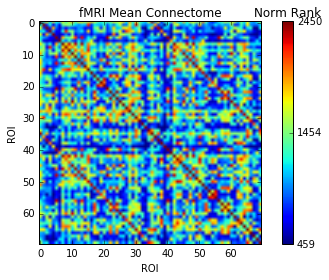

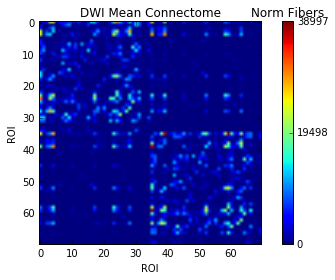

In [5]:
%matplotlib inline
basepath = '/data/connectome_stats/'
fmri_mean = nx.read_weighted_edgelist(os.path.join(basepath, 'fmrimean_1709.edgelist'))
dwi_mean = nx.read_weighted_edgelist(os.path.join(basepath, 'dwimean_2861.edgelist'))

nodes = np.array(fmri_mean.nodes())
argsort = np.argsort(nodes.astype(int))
fmrimean_mtx = nx.to_numpy_matrix(fmri_mean, nodelist=nodes[argsort].tolist())
dwimean_mtx = nx.to_numpy_matrix(dwi_mean, nodelist=nodes[argsort].tolist())

# normalize
fmrimean_mtx = fmrimean_mtx
dwimean_mtx = dwimean_mtx

def plot_connectome(mtx, title, xlabel, ylabel, cbart, rd=1.0, fmin=None, fmax=None, tickvals=None, ticks=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.imshow(mtx, vmin=fmin, vmax=fmax)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    if (fmin == None):
        fmin = np.ceil(np.min(mtx)/rd)*rd
    if (fmax == None):
        fmax = np.floor(np.max(mtx)/rd)*rd
    if ticks is not None:
        ax.set_xticks(tickvals)
        ax.set_xticklabels(ticks)
        ax.set_yticks(tickvals)
        ax.set_yticklabels(ticks)
    cbar = fig.colorbar(cax, ticks=[fmin, (fmin+fmax)/2.0, fmax])
    cbar.ax.set_title(cbart)
    fig.tight_layout()
    return fig

fig1 = plot_connectome(fmrimean_mtx, 'fMRI Mean Connectome', 'ROI', 'ROI', 'Norm Rank')
fig1.show()

fig2 = plot_connectome(dwimean_mtx, 'DWI Mean Connectome', 'ROI', 'ROI', 'Norm Fibers')
fig2.show()

### Blocked Data

here, we will average the connectivity in the ipsilateral and contralateral hemispheres, and show the average connectivity and variance of the connectivity per hemisphere:

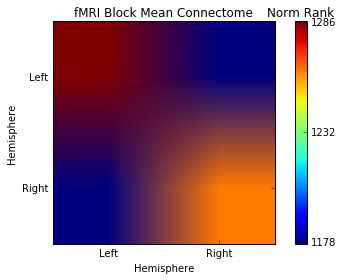

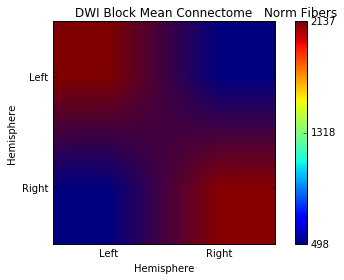

In [6]:
lh = np.arange(0, 35)
rh = np.arange(35, 70)
fmri_blockmean = np.zeros((2, 2))
fmri_blockstd = np.zeros((2, 2))
dwi_blockmean = np.zeros((2, 2))
dwi_blockstd = np.zeros((2, 2))

for i, h1 in enumerate([lh, rh]):
    for j, h2 in enumerate([lh, rh]):
        fmri_blockmean[i, j] = np.nanmean(fmrimean_mtx[i*35:(i+1)*35, j*35:(j+1)*35])
        fmri_blockstd[i, j] = np.nanstd(fmrimean_mtx[i*35:(i+1)*35, j*35:(j+1)*35])
        dwi_blockmean[i, j] = np.nanmean(dwimean_mtx[i*35:(i+1)*35, j*35:(j+1)*35])
        dwi_blockstd[i, j] = np.nanstd(dwimean_mtx[i*35:(i+1)*35, j*35:(j+1)*35])

ticks = ['Left', 'Right']
tickvals = [0, 1]
fig1 = plot_connectome(fmri_blockmean, 'fMRI Block Mean Connectome', 'Hemisphere', 'Hemisphere', 'Norm Rank', ticks=ticks, tickvals=tickvals)
fig1.show()

fig2 = plot_connectome(dwi_blockmean, 'DWI Block Mean Connectome', 'Hemisphere', 'Hemisphere', 'Norm Fibers', ticks=ticks, tickvals=tickvals)
fig2.show()

# Difference in Ipsilateral vs. Contralateral Connectivity

Here, we aggregate all of the edge weights ipsilaterally and contralaterally, along with the number of edges this information is aggregated over for each connection type. We feed this into a simple z-test with the appropriate assumptions (unequal variance, goal is to test for ipsilateral connectivity exceeding contralateral connectivity):

## Functional


In [17]:
from scipy.stats import norm

def one_sided_ztest(a, b, axis=1):
    """
    A function that performs a one-sided t-test that the mean in population a exceeds the
    mean in population b. that is, H0: ma <= mb, Ha: ma > mb. Uses scipy's two-sided t-test,
    that is, H0: ma = mb, Ha ma != mb.
    """
    u1 = np.nanmean(a)
    u2 = np.nanmean(b)
    n1 = np.prod(a.shape)
    n2 = np.prod(a.shape)
    s1 = np.nanstd(a)
    s2 = np.nanstd(b)
    tstat = (u1 - u2)/np.sqrt((s1**2/float(n1)) + (s2**2/float(n2)))
    ptest = np.float64(1)- np.float64(norm.cdf(tstat))
    return tstat, ptest
    


fips = np.vstack((fmrimean_mtx[0:35, 0:35], fmrimean_mtx[35:70, 35:70])).flatten()[0,]
fcon = np.vstack((fmrimean_mtx[35:70, 0:35], fmrimean_mtx[0:35, 35:70])).flatten()[0,]

test, pval = one_sided_ztest(fips, fcon, axis=1)
print("Test Statistic: {}".format(test))
print("P-value: {}".format(pval))

Test Statistic: 7.09157728739
P-value: 6.62914168004e-13


## Diffusion

In [23]:
dips = np.vstack((dwimean_mtx[0:35, 0:35], dwimean_mtx[35:70, 35:70])).flatten()
dcon = np.vstack((dwimean_mtx[35:70, 0:35], dwimean_mtx[0:35, 35:70])).flatten()

test, pval = one_sided_ztest(dips, dcon, axis=1)
print("Test Statistic: {}".format(test))
print("P-value: {}".format(pval))
print("Minimum Numpy float64: {}".format(np.nextafter(np.float64(0), np.float64(1))))

Test Statistic: 16.546775719
P-value: 0.0
Minimum Numpy float64: 4.94065645841e-324


As we can see above, both the functional and diffusion connectomes have a significant difference in the mean ipsilateral vs. contralateral connectivity. However, the Diffusion connectomes are significant with probability of observing a sample statistic as extreme as the test statistic below the precision of 64-bit float $\left(p < 4.94 \times 10^{-324}\right)$, whereas the functional connectomes are significant with probability of just $6.62 \times 10^{-13}$.